In [48]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import cufflinks as cf
from pandas_datareader import data
import plotly.express as px

# Load the data from the CSV file
print('Loading...')

# header=[0,1]: csv contains multi-level header, first 2 rows should be used as headers of DF
# index_col=0: use the first column (index 0) as the DataFrame's index (uniquely identify each row)
# parse_dates=[0]: first column contains date strings, pandas will automatically convert them into datetime objects
df = pd.read_csv('../data/stocks.csv', header=[0,1], index_col=0, parse_dates=[0])

print('Loaded')

Loading...
Loaded


In [33]:
df

Attributes   Adj Close                              Close             \
Symbols           MSFT         GE        AAPL        MSFT         GE   
Date                                                                   
2010-01-04   24.049969  11.001803    6.583586   30.950001  14.855769   
2010-01-05   24.057743  11.058768    6.594968   30.959999  14.932692   
2010-01-06   23.910097  11.001803    6.490066   30.770000  14.855769   
2010-01-07   23.661432  11.571475    6.478067   30.450001  15.625000   
2010-01-08   23.824627  11.820707    6.521136   30.660000  15.961538   
...                ...        ...         ...         ...        ...   
2020-12-24  222.238144  10.650000  131.773087  222.750000  10.650000   
2020-12-28  224.443069  10.640000  136.486053  224.960007  10.640000   
2020-12-29  223.634918  10.560000  134.668762  224.149994  10.560000   
2020-12-30  221.170593  10.710000  133.520477  221.679993  10.710000   
2020-12-31  221.908905  10.800000  132.492020  222.419998  10.800000   

Attributes                    High                                Low  \
Symbols           AAPL        MSFT         GE        AAPL        MSFT   
Date                                                                    
2010-01-04    7.643214   31.100000  15.038462    7.660714   30.590000   
2010-01-05    7.656429   31.100000  15.067308    7.699643   30.639999   
2010-01-06    7.534643   31.080000  15.019231    7.686786   30.520000   
2010-01-07    7.520714   30.700001  15.846154    7.571429   30.190001   
2010-01-08    7.570714   30.879999  16.048077    7.571429   30.240000   
...                ...         ...        ...         ...         ...   
2020-12-24  131.970001  223.610001  10.850000  133.460007  221.199997   
2020-12-28  136.690002  226.029999  10.780000  137.339996  223.020004   
2020-12-29  134.869995  227.179993  10.770000  138.789993  223.580002   
2020-12-30  133.720001  225.630005  10.850000  135.990005  221.470001   
2020-12-31  132.690002  223.000000  10.830000  134.740005  219.679993   

Attributes                               Open                         \
Symbols            GE        AAPL        MSFT         GE        AAPL   
Date                                                                   
2010-01-04  14.567308    7.585000   30.620001  14.634615    7.622500   
2010-01-05  14.855769    7.616071   30.850000  14.865385    7.664286   
2010-01-06  14.846154    7.526786   30.879999  14.932692    7.656429   
2010-01-07  14.836538    7.466071   30.629999  14.884615    7.562500   
2010-01-08  15.644231    7.466429   30.280001  15.682692    7.510714   
...               ...         ...         ...        ...         ...   
2020-12-24  10.620000  131.100006  221.419998  10.850000  131.320007   
2020-12-28  10.580000  133.509995  224.449997  10.700000  133.990005   
2020-12-29  10.540000  134.339996  226.309998  10.660000  138.050003   
2020-12-30  10.550000  133.399994  225.229996  10.580000  135.580002   
2020-12-31  10.580000  131.720001  221.699997  10.650000  134.080002   

Attributes      Volume                            
Symbols           MSFT           GE         AAPL  
Date                                              
2010-01-04  38409100.0   69763096.0  493729600.0  
2010-01-05  49749600.0   67132624.0  601904800.0  
2010-01-06  58182400.0   57683496.0  552160000.0  
2010-01-07  50559700.0  192891192.0  477131200.0  
2010-01-08  51197400.0  119717104.0  447610800.0  
...                ...          ...          ...  
2020-12-24  10550600.0   30049700.0   54930100.0  
2020-12-28  17933500.0   53796700.0  124486200.0  
2020-12-29  17403200.0   53035900.0  121047300.0  
2020-12-30  20272300.0   50621000.0   96452100.0  
2020-12-31  20942100.0   47702300.0   99116600.0  

[2769 rows x 18 columns]

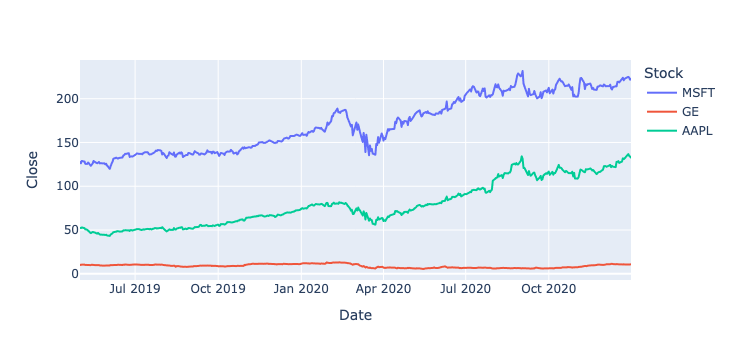

In [50]:
cf.set_config_file(offline=True)

df_filtered = df.loc["2019-05":, ("Close")]

# Since df_filtered may have multiple columns, we'll need to reset the index and melt the DataFrame
df_melted = df_filtered.reset_index().melt(id_vars='Date', var_name='Stock', value_name='Close')

fig = px.line(df_melted, x='Date', y='Close', color='Stock')
fig.show()

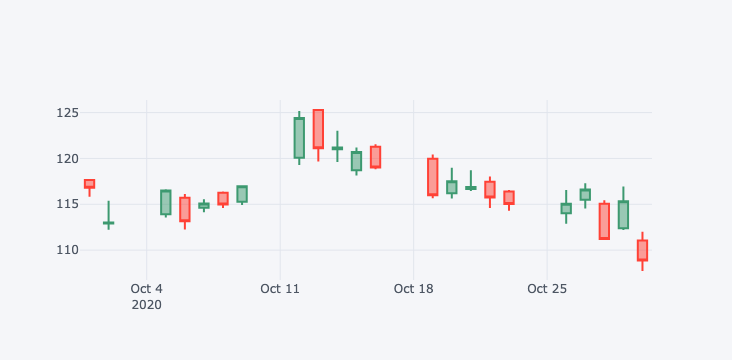

In [59]:
aapl = df.swaplevel(axis=1).AAPL

aapl.loc["2020-10"].iplot(kind="candle")

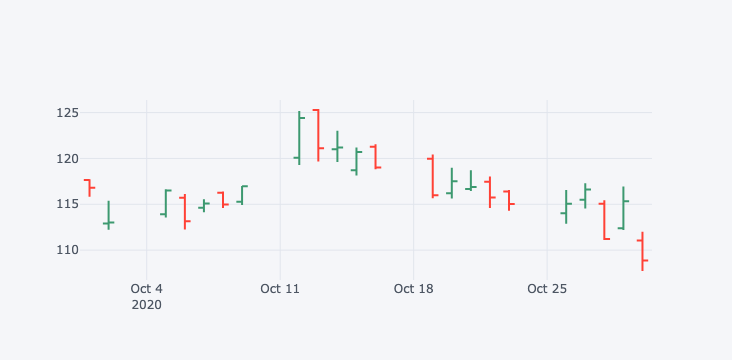

In [60]:
aapl.loc["2020-10"].iplot(kind="ohlc")